<a href="https://colab.research.google.com/github/chriscc447/orie3120_final/blob/main/differences_in_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sn
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("grouped_songs_dataset.csv")
df=df.dropna()
df=df.drop(columns=['uri','rank_mean','lowest_rank','rank_median','highest_rank','streams_mean','streams_min','streams_median','streams_sum','first_date','last_date','streams_max'])
df['topten']=0.0
df['botten']=0.0

In [ ]:
df.head()

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,topten,botten
0,Migos,Bad and Boujee (feat. Lil Uzi Vert),0.927,0.665,11.0,-5.313,1.0,0.2440,0.061,0.000000,0.123,0.175,127.076,343150.0,4.0,429.0,0.0,0.0
1,Drake,Fake Love,0.928,0.481,9.0,-9.350,0.0,0.2870,0.105,0.000000,0.176,0.613,134.007,210937.0,4.0,455.0,0.0,0.0
2,The Weeknd,Starboy,0.679,0.587,7.0,-7.015,1.0,0.2760,0.141,0.000006,0.137,0.486,186.003,230453.0,4.0,464.0,0.0,0.0
3,The Chainsmokers,Closer,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.000000,0.111,0.661,95.010,244960.0,4.0,536.0,0.0,0.0
4,Rae Sremmurd,Black Beatles,0.794,0.632,0.0,-6.163,1.0,0.0649,0.142,0.000000,0.128,0.355,145.926,291893.0,4.0,240.0,0.0,0.0


In [ ]:
topten =  df.iloc[df['ndays'].nlargest(10).index]
topten

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,topten,botten
58,Travis Scott,goosebumps,0.841,0.728,7.0,-3.370,1.0,0.0484,0.084700,0.000000,0.1490,0.430,130.049,243837.0,4.0,1177.0,1.0,0.0
531,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,11.0,-6.366,0.0,0.2310,0.002640,0.000000,0.1090,0.401,155.096,182707.0,4.0,1154.0,1.0,0.0
113,Post Malone,Congratulations,0.630,0.804,6.0,-4.183,1.0,0.0363,0.215000,0.000000,0.2530,0.492,123.146,220293.0,4.0,1093.0,1.0,0.0
224,Khalid,Location,0.736,0.449,1.0,-11.462,0.0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080.0,4.0,989.0,1.0,0.0
1068,XXXTENTACION,Jocelyn Flores,0.872,0.391,0.0,-9.144,0.0,0.2420,0.469000,0.000004,0.2970,0.437,134.021,119133.0,4.0,960.0,1.0,0.0
1141,Post Malone,rockstar,0.585,0.520,5.0,-6.136,0.0,0.0712,0.124000,0.000070,0.1310,0.129,159.801,218147.0,4.0,940.0,1.0,0.0
1148,Post Malone,I Fall Apart,0.556,0.538,8.0,-5.408,0.0,0.0382,0.068900,0.000000,0.1960,0.291,143.950,223347.0,4.0,938.0,1.0,0.0
1069,XXXTENTACION,Fuck Love (feat. Trippie Redd),0.797,0.533,0.0,-9.740,0.0,0.0412,0.017200,0.000152,0.1030,0.329,131.036,146520.0,4.0,937.0,1.0,0.0
540,Kendrick Lamar,HUMBLE.,0.908,0.621,1.0,-6.638,0.0,0.1020,0.000282,0.000054,0.0958,0.421,150.011,177000.0,4.0,928.0,1.0,0.0
765,Lauv,I Like Me Better,0.752,0.505,9.0,-7.621,1.0,0.2530,0.535000,0.000003,0.1040,0.419,91.970,197437.0,4.0,916.0,1.0,0.0


In [ ]:
df.loc[df['ndays']>=916.0 ,'topten']= 1.0
df[df['topten']==1]

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,topten,botten
58,Travis Scott,goosebumps,0.841,0.728,7.0,-3.370,1.0,0.0484,0.084700,0.000000,0.1490,0.430,130.049,243837.0,4.0,1177.0,1.0,0.0
113,Post Malone,Congratulations,0.630,0.804,6.0,-4.183,1.0,0.0363,0.215000,0.000000,0.2530,0.492,123.146,220293.0,4.0,1093.0,1.0,0.0
224,Khalid,Location,0.736,0.449,1.0,-11.462,0.0,0.4250,0.330000,0.000162,0.0898,0.326,80.126,219080.0,4.0,989.0,1.0,0.0
531,Lil Uzi Vert,XO TOUR Llif3,0.732,0.750,11.0,-6.366,0.0,0.2310,0.002640,0.000000,0.1090,0.401,155.096,182707.0,4.0,1154.0,1.0,0.0
540,Kendrick Lamar,HUMBLE.,0.908,0.621,1.0,-6.638,0.0,0.1020,0.000282,0.000054,0.0958,0.421,150.011,177000.0,4.0,928.0,1.0,0.0
765,Lauv,I Like Me Better,0.752,0.505,9.0,-7.621,1.0,0.2530,0.535000,0.000003,0.1040,0.419,91.970,197437.0,4.0,916.0,1.0,0.0
1068,XXXTENTACION,Jocelyn Flores,0.872,0.391,0.0,-9.144,0.0,0.2420,0.469000,0.000004,0.2970,0.437,134.021,119133.0,4.0,960.0,1.0,0.0
1069,XXXTENTACION,Fuck Love (feat. Trippie Redd),0.797,0.533,0.0,-9.740,0.0,0.0412,0.017200,0.000152,0.1030,0.329,131.036,146520.0,4.0,937.0,1.0,0.0
1141,Post Malone,rockstar,0.585,0.520,5.0,-6.136,0.0,0.0712,0.124000,0.000070,0.1310,0.129,159.801,218147.0,4.0,940.0,1.0,0.0
1148,Post Malone,I Fall Apart,0.556,0.538,8.0,-5.408,0.0,0.0382,0.068900,0.000000,0.1960,0.291,143.950,223347.0,4.0,938.0,1.0,0.0


In [ ]:
botten = df.iloc[df['ndays'].nsmallest(10).index]
botten

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,topten,botten
76,Pharrell Williams,"Happy - From ""Despicable Me 2""",0.647,0.822,5.0,-4.662,0.0,0.1830,0.219000,0.000000,0.0908,0.962,160.019,232720.0,4.0,1.0,0.0,1.0
82,David Guetta,Titanium (feat. Sia),0.604,0.787,0.0,-3.674,0.0,0.1030,0.067900,0.150000,0.1270,0.301,126.062,245040.0,4.0,1.0,0.0,1.0
121,Paul Simon,You Can Call Me Al,0.776,0.763,5.0,-8.124,1.0,0.0535,0.182000,0.006500,0.0770,0.820,128.433,280000.0,4.0,1.0,0.0,1.0
133,Michael Jackson,P.Y.T. (Pretty Young Thing),0.888,0.815,11.0,-4.909,0.0,0.0404,0.230000,0.000424,0.1270,0.961,127.273,238733.0,4.0,1.0,0.0,1.0
136,Carly Rae Jepsen,Call Me Maybe,0.783,0.580,7.0,-6.548,1.0,0.0408,0.011400,0.000002,0.1080,0.660,120.021,193400.0,4.0,1.0,0.0,1.0
141,Skrillex,Purple Lamborghini (with Rick Ross),0.457,0.899,10.0,-2.591,0.0,0.1320,0.001900,0.000000,0.8310,0.298,147.268,215510.0,4.0,1.0,0.0,1.0
145,Calvin Harris,Feel So Close - Radio Edit,0.707,0.924,7.0,-2.842,1.0,0.0310,0.000972,0.007030,0.2040,0.919,127.937,206413.0,4.0,1.0,0.0,1.0
155,Future,Wicked,0.718,0.679,11.0,-5.899,0.0,0.0706,0.001910,0.010400,0.3850,0.205,157.970,173347.0,4.0,1.0,0.0,1.0
157,O.T. Genasis,Cut It (feat. Young Dolph),0.875,0.673,7.0,-4.184,1.0,0.0932,0.135000,0.000000,0.2920,0.231,130.000,222600.0,4.0,1.0,0.0,1.0
169,Otis Redding,Stand by Me,0.883,0.464,10.0,-11.251,1.0,0.0591,0.279000,0.000015,0.0744,0.925,111.548,172333.0,4.0,1.0,0.0,1.0


In [ ]:
df.iloc[df["ndays"].nsmallest(10).index,df.columns.get_loc('botten')]=1
df[df['botten']==1]

,artist,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,ndays,topten,botten
76,Pharrell Williams,"Happy - From ""Despicable Me 2""",0.647,0.822,5.0,-4.662,0.0,0.1830,0.219000,0.000000,0.0908,0.962,160.019,232720.0,4.0,1.0,0.0,1.0
82,David Guetta,Titanium (feat. Sia),0.604,0.787,0.0,-3.674,0.0,0.1030,0.067900,0.150000,0.1270,0.301,126.062,245040.0,4.0,1.0,0.0,1.0
121,Paul Simon,You Can Call Me Al,0.776,0.763,5.0,-8.124,1.0,0.0535,0.182000,0.006500,0.0770,0.820,128.433,280000.0,4.0,1.0,0.0,1.0
133,Michael Jackson,P.Y.T. (Pretty Young Thing),0.888,0.815,11.0,-4.909,0.0,0.0404,0.230000,0.000424,0.1270,0.961,127.273,238733.0,4.0,1.0,0.0,1.0
136,Carly Rae Jepsen,Call Me Maybe,0.783,0.580,7.0,-6.548,1.0,0.0408,0.011400,0.000002,0.1080,0.660,120.021,193400.0,4.0,1.0,0.0,1.0
141,Skrillex,Purple Lamborghini (with Rick Ross),0.457,0.899,10.0,-2.591,0.0,0.1320,0.001900,0.000000,0.8310,0.298,147.268,215510.0,4.0,1.0,0.0,1.0
145,Calvin Harris,Feel So Close - Radio Edit,0.707,0.924,7.0,-2.842,1.0,0.0310,0.000972,0.007030,0.2040,0.919,127.937,206413.0,4.0,1.0,0.0,1.0
155,Future,Wicked,0.718,0.679,11.0,-5.899,0.0,0.0706,0.001910,0.010400,0.3850,0.205,157.970,173347.0,4.0,1.0,0.0,1.0
157,O.T. Genasis,Cut It (feat. Young Dolph),0.875,0.673,7.0,-4.184,1.0,0.0932,0.135000,0.000000,0.2920,0.231,130.000,222600.0,4.0,1.0,0.0,1.0
169,Otis Redding,Stand by Me,0.883,0.464,10.0,-11.251,1.0,0.0591,0.279000,0.000015,0.0744,0.925,111.548,172333.0,4.0,1.0,0.0,1.0


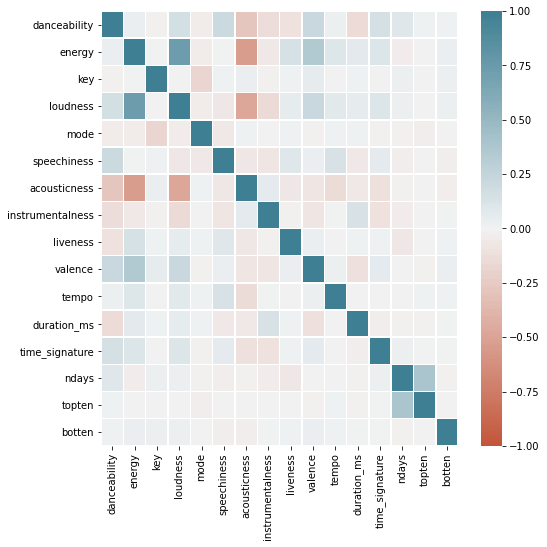

In [ ]:
#show correlation between ind vars
df_corr = df.copy()
df_corr = df.corr()
df_corr

plt.figure(figsize=(8,8))
sn.heatmap(df_corr, cmap = sn.diverging_palette(20, 220, n = 200), vmin = -1, vmax = 1, linewidths = 0.5) # annot = True
plt.show()


In [ ]:
#avg 
grouptop= df[df['topten']==1].drop(columns=['botten'])
tenmean= grouptop.mean().round(3).to_frame().reset_index()
tenmean.columns=['','Top 10 Averages']
tenmean

'\\begin{tabular}{llr}\n\\toprule\n{} &  Top 10 Averages \\\\\n\\midrule\n0  &      danceability &            0.741 \\\\\n1  &            energy &            0.584 \\\\\n2  &               key &            4.800 \\\\\n3  &          loudness &           -7.007 \\\\\n4  &              mode &            0.300 \\\\\n5  &       speechiness &            0.149 \\\\\n6  &      acousticness &            0.185 \\\\\n7  &  instrumentalness &            0.000 \\\\\n8  &          liveness &            0.153 \\\\\n9  &           valence &            0.368 \\\\\n10 &             tempo &          129.921 \\\\\n11 &       duration\\_ms &       194750.100 \\\\\n12 &    time\\_signature &            4.000 \\\\\n13 &             ndays &         1003.200 \\\\\n14 &            topten &            1.000 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
groupbot= df[df['botten']==1].drop(columns=['topten'])
groupbot.mean().round(3).to_frame()
botmean= groupbot.mean().round(3).to_frame().reset_index()
botmean.columns=['','Bottom 10 Averages']
botmean

,,Bottom 10 Averages
0,danceability,0.734
1,energy,0.741
2,key,7.300
3,loudness,-5.468
4,mode,0.500
5,speechiness,0.081
6,acousticness,0.113
7,instrumentalness,0.017
8,liveness,0.232
9,valence,0.628


In [ ]:
botmean['Top 10 Averages']=tenmean['Top 10 Averages']
botmean

,,Bottom 10 Averages,Top 10 Averages
0,danceability,0.734,0.741
1,energy,0.741,0.584
2,key,7.300,4.800
3,loudness,-5.468,-7.007
4,mode,0.500,0.300
5,speechiness,0.081,0.149
6,acousticness,0.113,0.185
7,instrumentalness,0.017,0.000
8,liveness,0.232,0.153
9,valence,0.628,0.368


In [ ]:
stats.ttest_ind(grouptop['danceability'],groupbot['danceability'])

Ttest_indResult(statistic=0.12268142241066925, pvalue=0.9037187629387546)

In [ ]:
stats.ttest_ind(grouptop['energy'],groupbot['energy'])

Ttest_indResult(statistic=-2.5028156146919214, pvalue=0.0221778191816224)

In [ ]:
stats.ttest_ind(grouptop['key'],groupbot['key'])

Ttest_indResult(statistic=-1.4890217098300782, pvalue=0.1537939315046059)

In [ ]:
stats.ttest_ind(grouptop['loudness'],groupbot['loudness'])


Ttest_indResult(statistic=-1.3313114132396704, pvalue=0.19970303645856116)

In [ ]:
stats.ttest_ind(grouptop['mode'],groupbot['mode'])

Ttest_indResult(statistic=-0.8846517369293829, pvalue=0.38800910715171766)

In [ ]:
stats.ttest_ind(grouptop['speechiness'],groupbot['speechiness'])

Ttest_indResult(statistic=1.5324765039508095, pvalue=0.14279234801715532)

In [ ]:
stats.ttest_ind(grouptop['acousticness'],groupbot['acousticness'])

Ttest_indResult(statistic=1.009093871961335, pvalue=0.32630295373177753)

In [ ]:
stats.ttest_ind(grouptop['instrumentalness'],groupbot['instrumentalness'])

Ttest_indResult(statistic=-1.1767959402238728, pvalue=0.25460501856437745)

In [ ]:
stats.ttest_ind(grouptop['liveness'],groupbot['liveness'])

Ttest_indResult(statistic=-1.0180723212413332, pvalue=0.3221332274588451)

In [ ]:
stats.ttest_ind(grouptop['valence'],groupbot['valence'])

Ttest_indResult(statistic=-2.3772123225079276, pvalue=0.02873808483664925)

In [ ]:
stats.ttest_ind(grouptop['tempo'],groupbot['tempo'])

Ttest_indResult(statistic=-0.38569183126147094, pvalue=0.7042452855693495)

In [ ]:
stats.ttest_ind(grouptop['duration_ms'],groupbot['duration_ms'])

Ttest_indResult(statistic=-1.4364177363387365, pvalue=0.16803702209700266)

In [ ]:
rows= ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
ps=[0.9037187629387546,0.0221778191816224,0.19970303645856116,0.38800910715171766,0.14279234801715532,0.32630295373177753,0.25460501856437745,0.3221332274588451,0.02873808483664925,0.7042452855693495,0.16803702209700266]

In [ ]:
nice_p={'AudioFeature':rows, 'P-value':ps}
pd.DataFrame(nice_p)

,AudioFeature,P-value
0,danceability,0.903719
1,energy,0.022178
2,loudness,0.199703
3,mode,0.388009
4,speechiness,0.142792
5,acousticness,0.326303
6,instrumentalness,0.254605
7,liveness,0.322133
8,valence,0.028738
9,tempo,0.704245
